# Аналитика в авиакомпании

/datasets/query_1.csv — результат первого запроса. В нём содержится информация о:
    - model — модели самолета
    - flights_amount — количество рейсов для каждой модели самолетов model в сентябре 2018 года

/datasets/query_3.csv — результат третьего запроса. В нём содержится информация о:
    - city — городах
    - average_flights — среднем количестве рейсов, прибывающих в город city за день в августе 2018 года

Для этих двух наборов данных нужно:
    - импортировать файлы;
    - изучить данные в них;
    - проверить типы данных на корректность;
    - выбрать топ-10 городов по количеству рейсов;
    - построить графики: модели самолетов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов;
    - сделать выводы по каждому из графиков, пояснить результат.

## Импортируем библиотеки и открываем данные 

In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st
import math
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
!pip install --upgrade --quiet seaborn

In [3]:
import seaborn as sns

In [4]:
df1 = pd.read_csv('/datasets/query_1.csv')

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


In [6]:
df1 = df1.sort_values('flights_amount', ascending = False).reset_index(drop = True)

In [7]:
df1

,model,flights_amount
0,Cessna 208 Caravan,4557
1,Bombardier CRJ-200,4446
2,Sukhoi SuperJet-100,4185
3,Airbus A321-200,960
4,Boeing 737-300,630
5,Airbus A319-100,607
6,Boeing 767-300,600
7,Boeing 777-300,300


В данных нет пропусков, названия столбцов и типы данных определены правильно.

Рассмотрим таблицу из третьего запроса:

In [8]:
df3 = pd.read_csv('/datasets/query_3.csv')

In [9]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


In [10]:
df3 = df3.sort_values('average_flights', ascending = False).reset_index(drop = True)

In [11]:
df3.head()

,city,average_flights
0,Москва,129.774194
1,Санкт-Петербург,31.161290
2,Новосибирск,17.322581
3,Красноярск,11.580645
4,Екатеринбург,11.322581


В данных так же нет пропусков, названия столбцов и типы данных определены правильно.

## Определим топ-10 городов по кол-ву принимаемых рейсов

In [12]:
top10 = df3.head(10)

In [13]:
top10

,city,average_flights
0,Москва,129.774194
1,Санкт-Петербург,31.161290
2,Новосибирск,17.322581
3,Красноярск,11.580645
4,Екатеринбург,11.322581
5,Ростов-на-Дону,10.193548
6,Пермь,10.129032
7,Брянск,10.000000
8,Сочи,9.612903
9,Ульяновск,9.580645


## Построим графики для полученных данных 

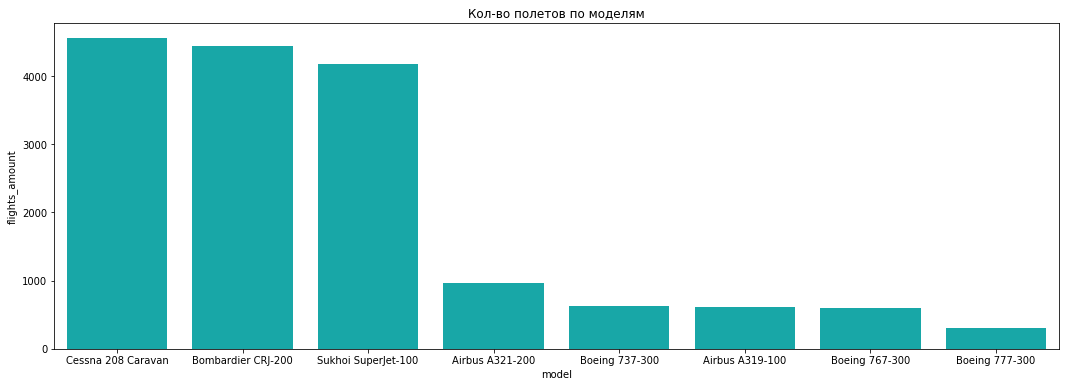

In [14]:
fig = plt.figure(figsize=(18,6))

plt.subplot()
plt.title('Кол-во полетов по моделям')
sns.barplot(x='model',y='flights_amount',data=df1, color="c")

Первые 3 места занимают самолеты для авиалиний малой и средней протяженности, вместимостью до 14, 50 и 103 места соответственно(согласно википедии).

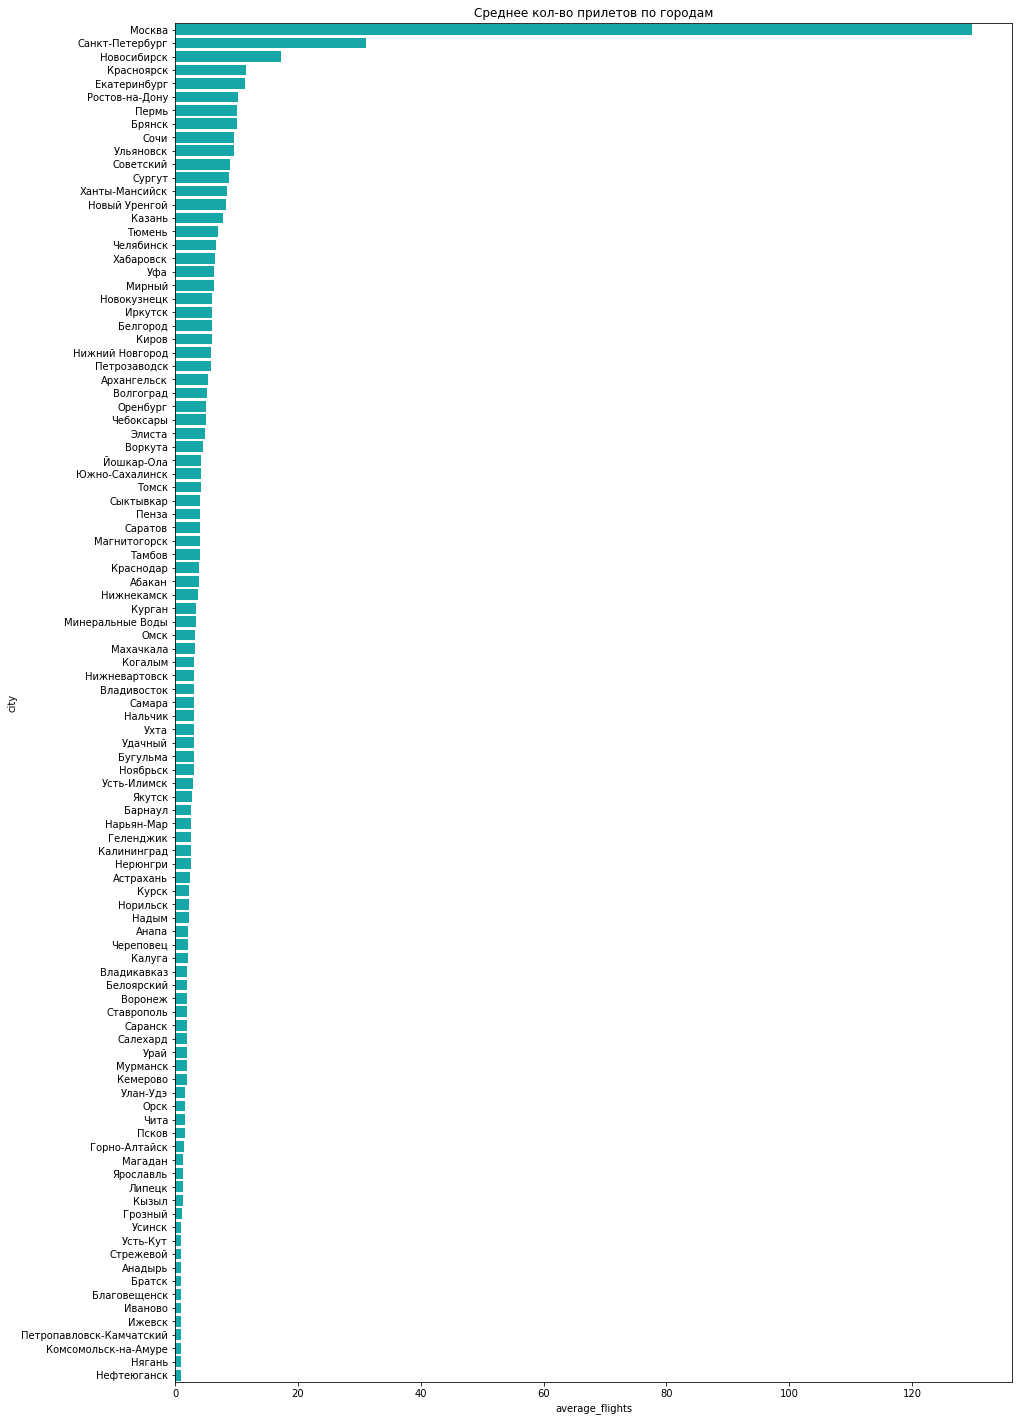

In [15]:
fig = plt.figure(figsize=(15,25))

plt.subplot()
plt.title('Среднее кол-во прилетов по городам')
g = sns.barplot(x='average_flights',y='city',data=df3, color="c")

С большим отрывом по среднему кол-ву принимаемых рейсов лидирует Москва, как основной транспортный хаб. На втором месте Санкт-Петербург, как второй по величине город и основное туристическое направление. На третьем месте Новосибирск, как самый крупный город Сибири, удобен как хаб для дальних перелетов с точки зрения инфраструктуры и своего географического расположения.

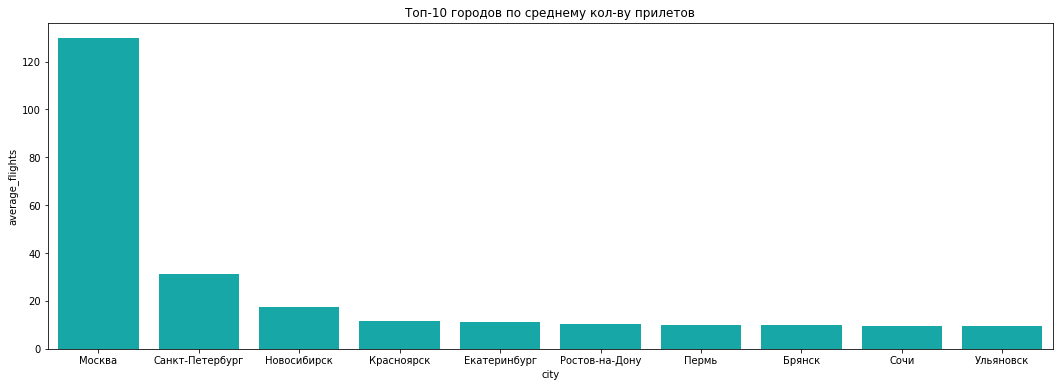

In [16]:
fig = plt.figure(figsize=(18,6))

plt.subplot()
plt.title('Топ-10 городов по среднему кол-ву прилетов')
sns.barplot(x='city',y='average_flights',data=top10, color="c")

Так же заключаем что топ-10 городов по кол-ву принимаемых рейсов занимают города, являющиеся региональными центрами.

## Общий вывод

Основной авиационный поток у нас сосредоточен на Москве с большим отрывом, затем идут другие региональные центры. Можем сделать вывод о том что все авиаперелеты так или иначе завязаны на Москве.
Основное же кол-во перелетов совершается самолетами предназначенными для малых и средних авиалиний.(Sukhoi SuperJet-100	имеет дальность 3000 или 4600км согласно данным Википедии)